### Wind data from redmar-CICESE stations 

http://redmar.cicese.mx

Useful stations are:

|Code|Station|Lat|Lon|
|:--:|:--:|:--:|:-:|
|ENSM|Ensenada| 31°50.894'N | 116°37.067'W|
|SNQN|San Quintín|30°29'4.23"N | 115°58'38.95"W|
|ICDN|Isla de Cedros|28°5.760'N|115°10.992'W|
|GROM|Guerrero Negro|27° 53' N |114° 09' W|
|LPAZ|La Paz|24° 10' N|110° 21' W|

<div>
<img src="figures/estaciones_redmar.png" width="500"/>
</div>


### Metadata

Centro de Investigacion Cientifica y de Educacion Superior de Ensenada
   
                  Laboaratorio del Nivel del Mar
                    Red Mareografica de CICESE
   
                       FORMATO DE DATOS
        Estaciones Mareograficas Meteorologicas Costeras (EMMC)
   
                       Zona de tiempo: GMT

|Col|  Variable          |       Unidades | Equipo|
|:--:|:--:|:--:|:--:|
|1  |  Anio   |                   -||
|2  |  Mes    |                  -||
|3  |  Dia    |                  -||
|4  |  Hora   |                  -||
|5  |  Minuto |                  -||
|6  |  Segundo |                 -||
|7  |  ID Estacion |             -||
|8  |  Voltaje sistema   |       V |         datalogger+sensores+radios|
|9  |  Nivel del mar |           m  |        sensor de presion sumergido Leveltrol 700|
|10 |  Nivel del mar |           m  |        sensor de presion burbujeador OTT-CBS|
|11 |  Switch1   |               -  |        switch de flotador superior|
|12 |  Switch2   |               -  |        switch de flotador inferior|
|13 |  Temperatura Agua  |       grados(C)|  sensor de temperatura 109SS-L|
|14 |  Nivel del mar   |         m        |  radar OTT-RSL|
|15 |  Radiacion Solar |         W/m^2    |  piranometro SP-212 ( no funcionando actualmente)|
|16 |  Direccion Viento |        Azimut   |  Vaisala WXT520|
|17 |  Magnitud Viento |         m/s (GROM) o km/h (ICDN)     |  Vaisala WXT520|
|18 |  Temperatura Aire |        grados(C)|  Vaisala WXT520|
|19 |  Humedad Relativa  |       %        | Vaisala WXT520|
|20 |  Presion Atmosferica |     mb      |   Vaisala WXT520|
|21 |  Precipitacion  |          mm      |   Vaisala WXT520|
|22 |  Voltaje estac. meteor. |  V       |   Vaisala WXT520|
|23 |  Nivel del Mar       |     m       |   radar Sutron R|

Nota: Texto escrito sin acentos


In [1]:
import cmocean as cmo
import datetime as dt
from matplotlib.dates import date2num
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import ssh_tools as ssht # my module
from scipy import signal


In [2]:
def stick_plot(time, u, v, **kw):
    '''Function by Filipe Fernandes: https://ocefpaf.github.io/python4oceanographers/blog/2014/09/15/stick_plot/'''
    width = kw.pop('width', 0.002)
    headwidth = kw.pop('headwidth', 0)
    headlength = kw.pop('headlength', 0)
    headaxislength = kw.pop('headaxislength', 0)
    angles = kw.pop('angles', 'uv')
    ax = kw.pop('ax', None)
    
    if angles != 'uv':
        raise AssertionError("Stickplot angles must be 'uv' so that"
                             "if *U*==*V* the angle of the arrow on"
                             "the plot is 45 degrees CCW from the *x*-axis.")

    time, u, v = map(np.asanyarray, (time, u, v))
    if not ax:
        fig, ax = plt.subplots()
    
    q = ax.quiver(date2num(time), [[0]*len(time)], u, v,
                  angles='uv', width=width, headwidth=headwidth,
                  headlength=headlength, headaxislength=headaxislength,
                  **kw)

    ax.axes.get_yaxis().set_visible(False)
    ax.xaxis_date()
    return q

def get_dataFrame(year, station):
    directory = '../REDMAR/'+station+'/'+year+'/'
    df = pd.DataFrame(columns = col_names)   
    for file in sorted([fname for fname in os.listdir(directory) if fname.endswith('.dat')]):
        filename = directory+file
        df_new = ssht.get_redmar_dataframe(filename, na_val=999)  
        df = df.append(df_new)
        continue
    return(df) 

In [3]:
col_names = ['year','month', 'day', 'hour','minute','second','ID',
                'voltage','ssh_leveltrol','ssh_burbujeador',
                'switch1','switch2', 'water_temp','ssh_radar',
                'solar_radiation','wind_dir','wind_speed',
                'air_temp','rel_humidity','atm_pressure', 'precipitation', 
                'voltage_station', 'ssh_radar_sutron']


### Identify delta like wind events

### 2016 Time series

In [4]:
year = '2016'
df_ICDN = get_dataFrame(year, 'ICDN')
df_GROM = get_dataFrame(year, 'GROM')     

#### Wind direction

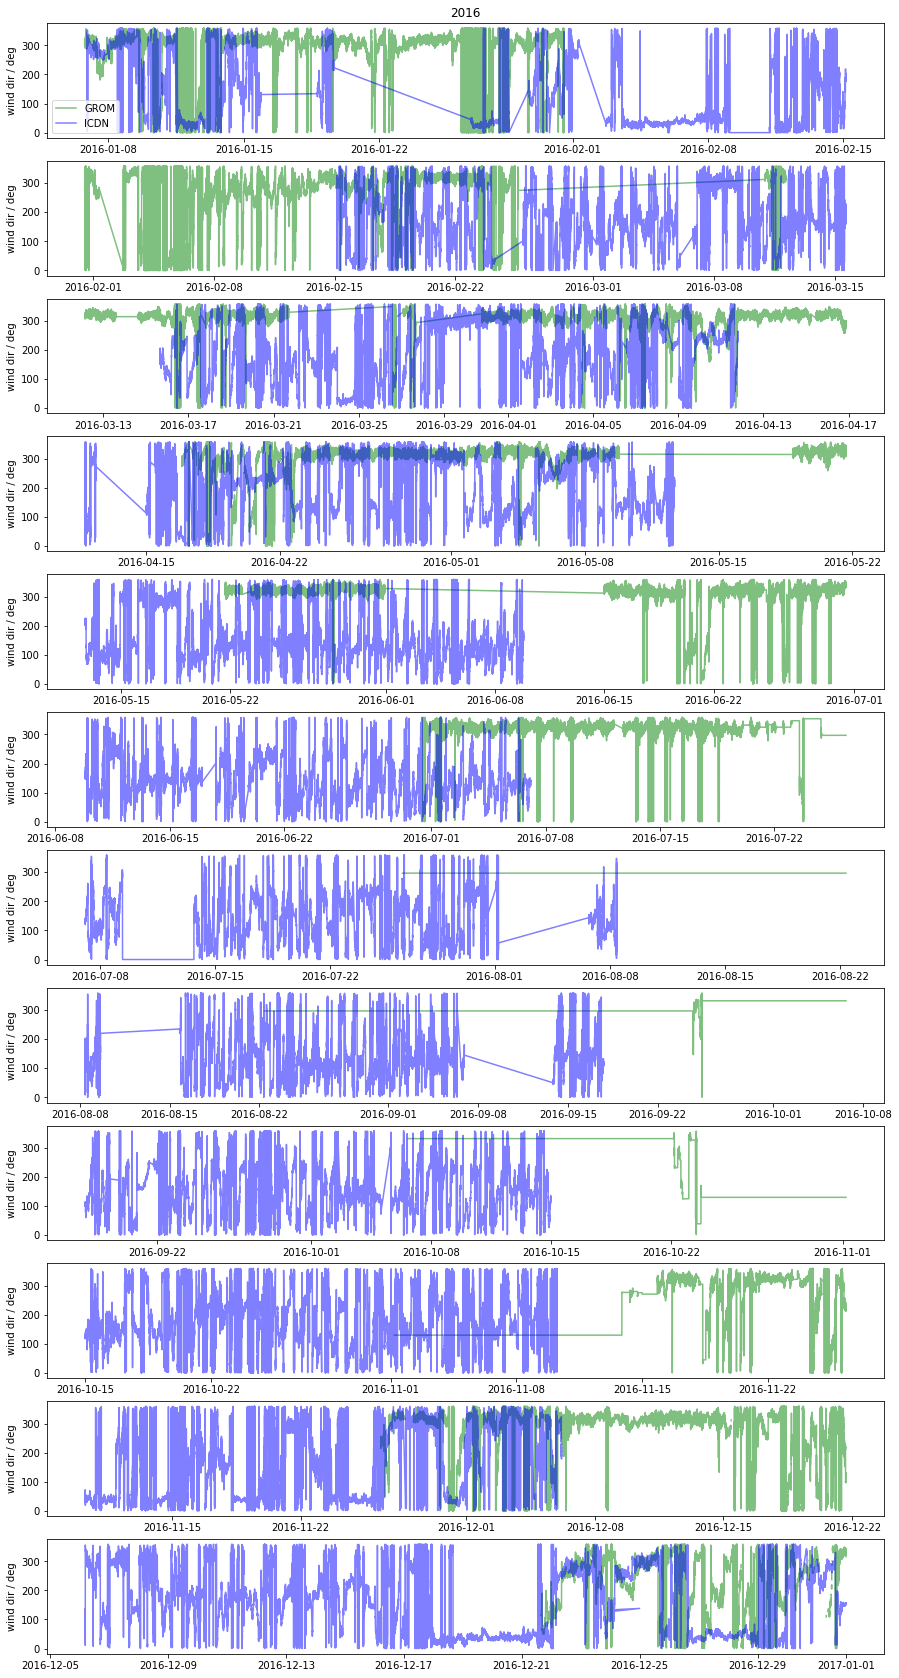

In [5]:
dir_GROM = df_GROM['wind_dir']
dir_ICDN = df_ICDN['wind_dir']

colors = ['green','blue']

fig, (ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10,ax11,ax12) = plt.subplots(12,1, figsize=(15,30), sharey=True)
axs = [ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10,ax11,ax12]
npts = int(len(df_ICDN.index)/len(axs))
for ax, jj in zip(axs,range(len(axs))):
    ax.plot(dir_GROM.index[jj*npts:(jj+1)*npts], dir_GROM[jj*npts:(jj+1)*npts],
            color=colors[0], alpha=0.5,label='GROM')
    ax.plot(dir_ICDN.index[jj*npts:(jj+1)*npts], dir_ICDN[jj*npts:(jj+1)*npts],
            color=colors[1], alpha=0.5,label='ICDN')
for ax in axs:
    ax.set_xlabel('')
    ax.set_ylabel('wind dir / deg')
ax1.legend()
ax1.set_title(year)
plt.show()

#### Wind speed

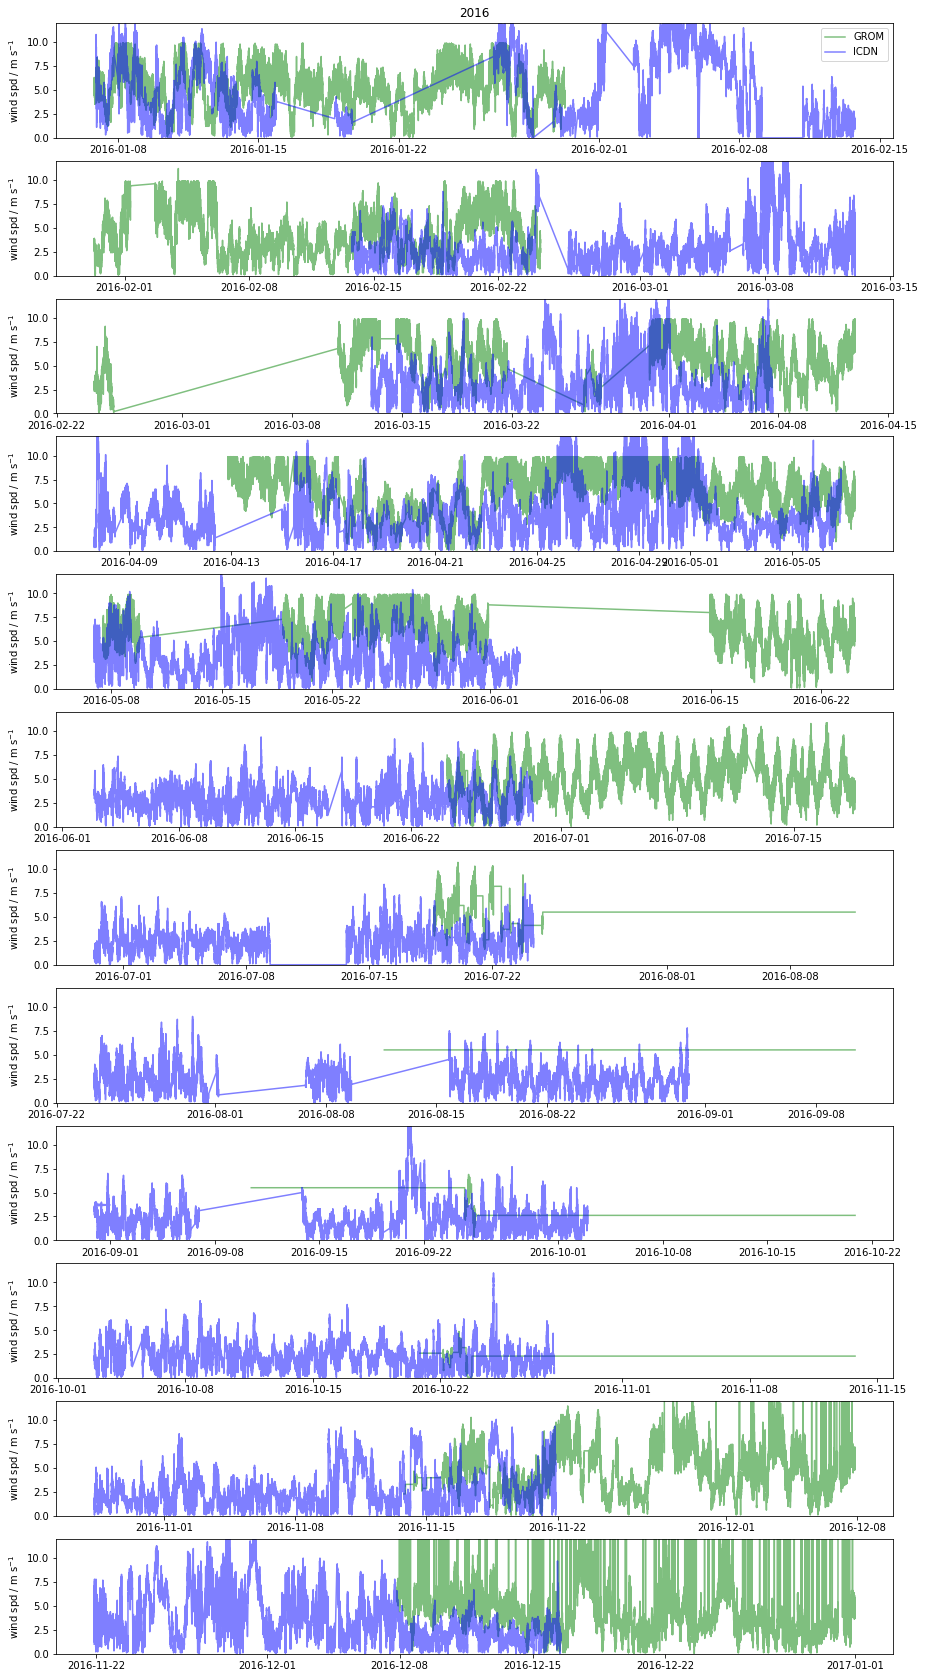

In [6]:
spd_GROM = df_GROM['wind_speed']
spd_ICDN = df_ICDN['wind_speed']

colors = ['green','blue']

fig, (ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10,ax11,ax12) = plt.subplots(12,1, figsize=(15,30), sharey=True)
axs = [ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10,ax11,ax12]
npts = int(len(df_GROM.index)/len(axs))
for ax, jj in zip(axs,range(len(axs))):
    ax.plot(spd_GROM.index[jj*npts:(jj+1)*npts], spd_GROM[jj*npts:(jj+1)*npts]/3.6,
            color=colors[0], alpha=0.5,label='GROM')
    ax.plot(spd_ICDN.index[jj*npts:(jj+1)*npts], spd_ICDN[jj*npts:(jj+1)*npts],
            color=colors[1], alpha=0.5,label='ICDN')
for ax in axs:
    ax.set_xlabel('')
    ax.set_ylabel('wind spd / m s$^{-1}$')
    ax.set_ylim(0,12)
ax1.legend()

ax1.set_title('2016')
plt.show()

 There are about 10 chunks where there are measurements for both, ICDN and GROM. Let's plot some of them:

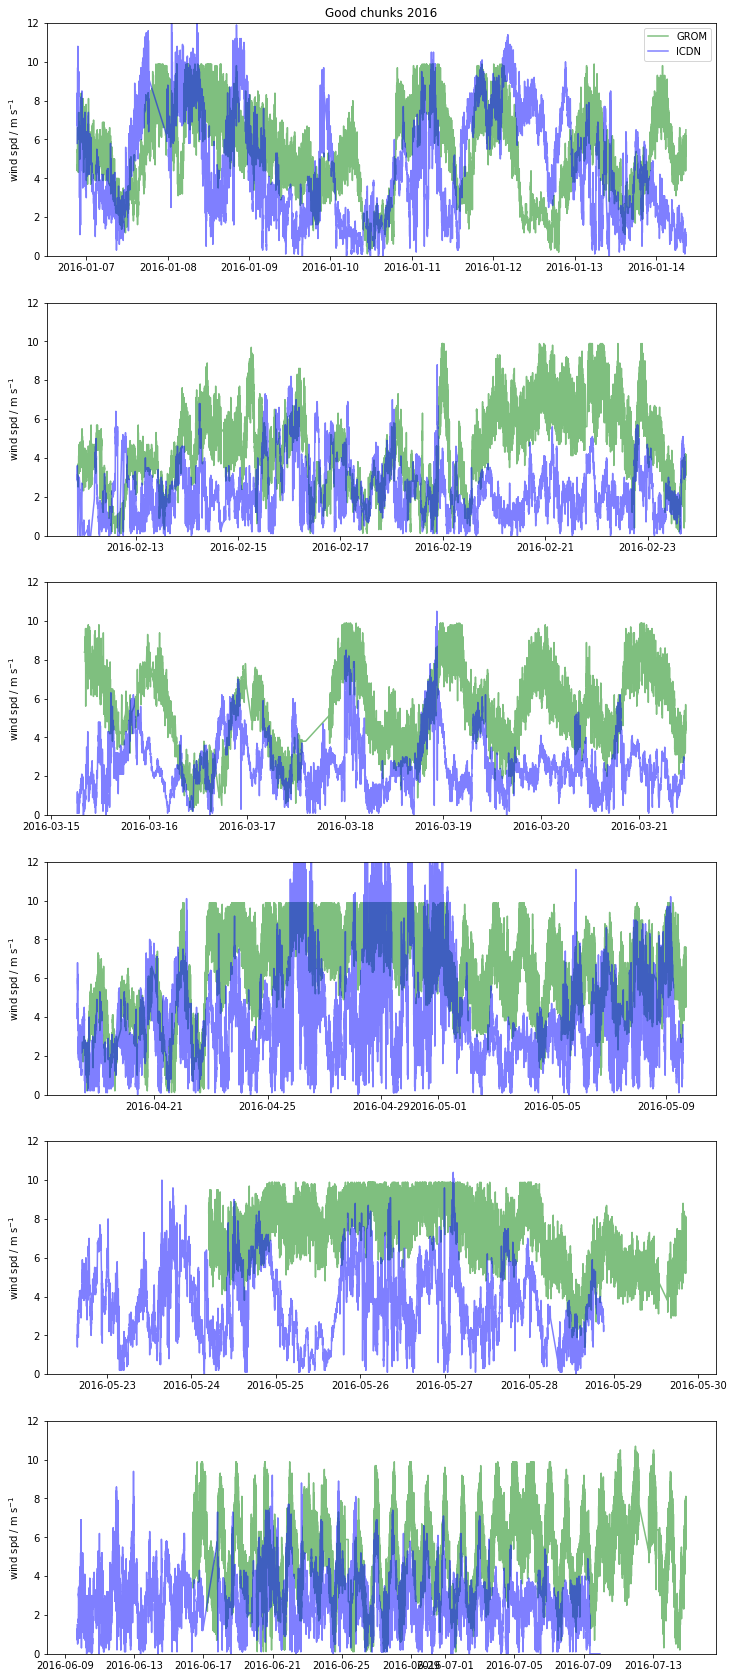

In [7]:
ini_inds_GROM = [129, 50471, 75000, 110000,147000,160000]
end_inds_GROM = [11000, 67560, 82500, 140000,155000,200000]
ini_inds_ICDN = [0, 32050, 71500, 112600,157000,180000]
end_inds_ICDN = [10254,48000, 80000, 140500,165000,220000]

colors = ['green','blue']

fig, (ax1,ax2,ax3,ax4,ax5,ax6) = plt.subplots(6,1, figsize=(12,30), sharey=True)
axs = [ax1,ax2,ax3,ax4,ax5,ax6,]

for ax, jj in zip(axs,range(len(ini_inds_GROM))):
    ax.plot(spd_GROM.index[ini_inds_GROM[jj]:end_inds_GROM[jj]], spd_GROM[ini_inds_GROM[jj]:end_inds_GROM[jj]]/3.6,
            color=colors[0], alpha=0.5,label='GROM')
    ax.plot(spd_ICDN.index[ini_inds_ICDN[jj]:end_inds_ICDN[jj]], spd_ICDN[ini_inds_ICDN[jj]:end_inds_ICDN[jj]],
            color=colors[1], alpha=0.5,label='ICDN')
for ax in axs:
    ax.set_xlabel('')
    ax.set_ylabel('wind spd / m s$^{-1}$')
    ax.set_ylim(0,12)
ax1.legend()

ax1.set_title('Good chunks 2016')
plt.show()

### U and V

In [8]:
u_GROM = spd_GROM[:]*np.cos((np.pi*(dir_GROM[:].astype(np.float)+0))/180)
v_GROM = spd_GROM[:]*np.sin((np.pi*(dir_GROM[:].astype(np.float)+0))/180)

u_ICDN = spd_ICDN[:]*np.cos((np.pi*(dir_ICDN[:].astype(np.float)+0))/180)
v_ICDN = spd_ICDN[:]*np.sin((np.pi*(dir_ICDN[:].astype(np.float)+0))/180)

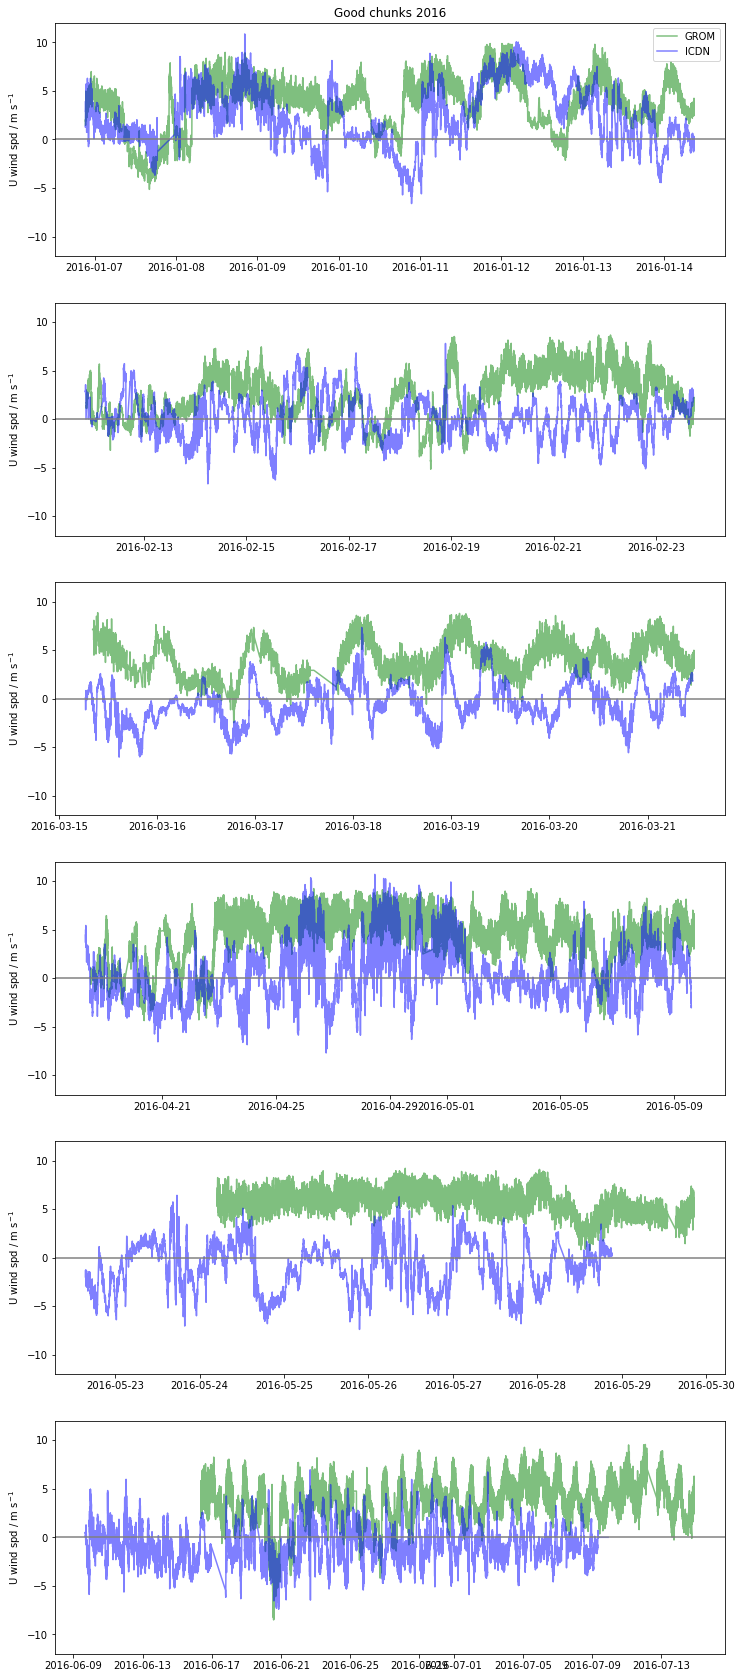

In [10]:
colors = ['green','blue']

fig, (ax1,ax2,ax3,ax4,ax5,ax6) = plt.subplots(6,1, figsize=(12,30), sharey=True)
axs = [ax1,ax2,ax3,ax4,ax5,ax6,]

for ax, jj in zip(axs,range(len(ini_inds_GROM))):
    ax.plot(u_GROM.index[ini_inds_GROM[jj]:end_inds_GROM[jj]], u_GROM[ini_inds_GROM[jj]:end_inds_GROM[jj]]/3.6,
            color=colors[0], alpha=0.5,label='GROM')
    ax.plot(u_ICDN.index[ini_inds_ICDN[jj]:end_inds_ICDN[jj]], u_ICDN[ini_inds_ICDN[jj]:end_inds_ICDN[jj]],
            color=colors[1], alpha=0.5,label='ICDN')
    ax.axhline(0, color='0.5')
for ax in axs:
    ax.set_xlabel('')
    ax.set_ylabel('U wind spd / m s$^{-1}$')
    ax.set_ylim(-12,12)
ax1.legend()

ax1.set_title('Good chunks 2016')
plt.show()

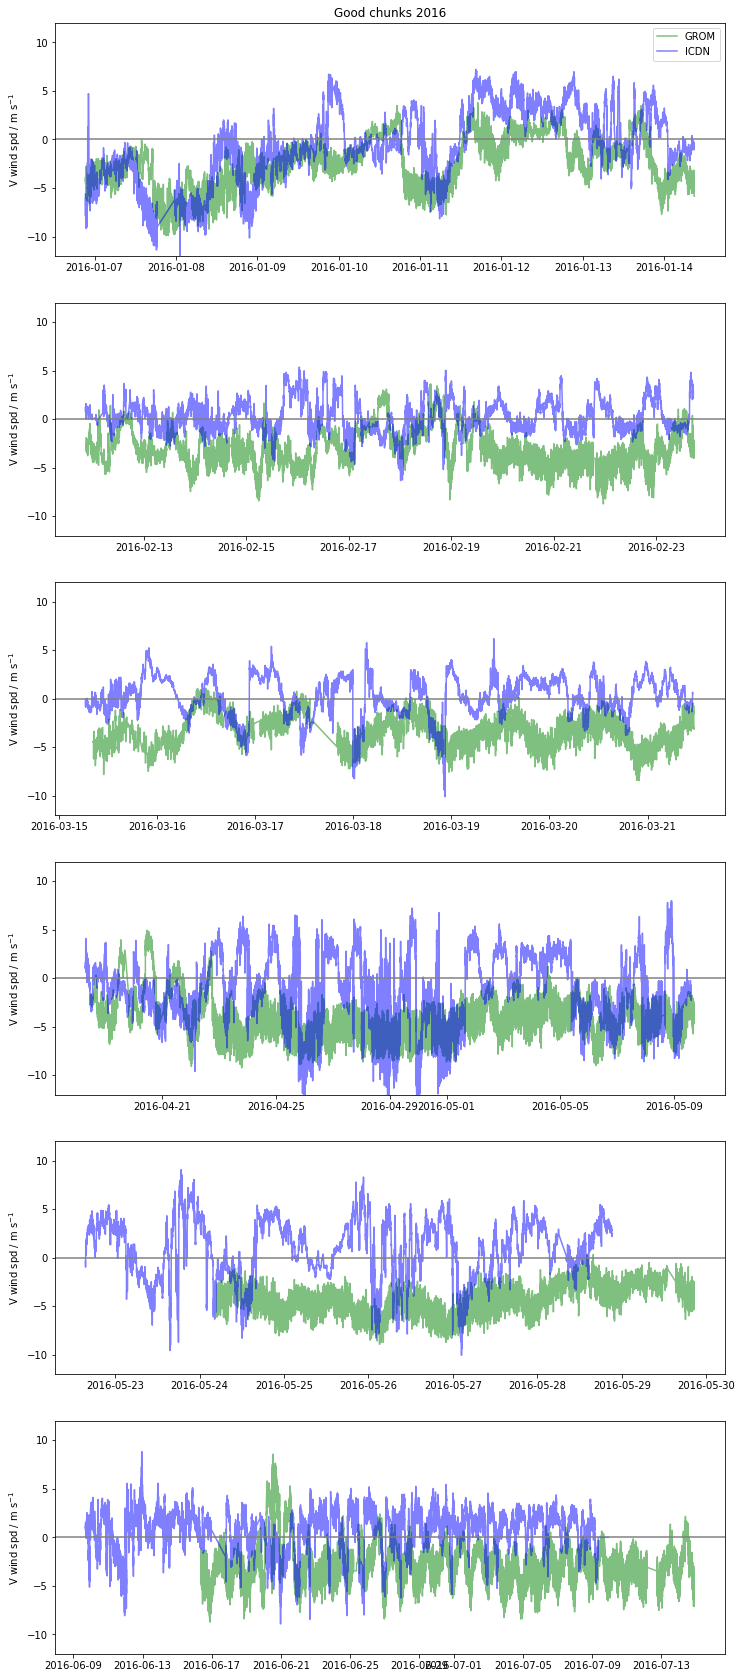

In [11]:
colors = ['green','blue']

fig, (ax1,ax2,ax3,ax4,ax5,ax6) = plt.subplots(6,1, figsize=(12,30), sharey=True)
axs = [ax1,ax2,ax3,ax4,ax5,ax6,]

for ax, jj in zip(axs,range(len(ini_inds_GROM))):
    ax.plot(v_GROM.index[ini_inds_GROM[jj]:end_inds_GROM[jj]], v_GROM[ini_inds_GROM[jj]:end_inds_GROM[jj]]/3.6,
            color=colors[0], alpha=0.5,label='GROM')
    ax.plot(v_ICDN.index[ini_inds_ICDN[jj]:end_inds_ICDN[jj]], v_ICDN[ini_inds_ICDN[jj]:end_inds_ICDN[jj]],
            color=colors[1], alpha=0.5,label='ICDN')
    ax.axhline(0, color='0.5')
for ax in axs:
    ax.set_xlabel('')
    ax.set_ylabel('V wind spd / m s$^{-1}$')
    ax.set_ylim(-12,12)
ax1.legend()

ax1.set_title('Good chunks 2016')
plt.show()

Text(0.5, 1.0, 'GROM 2016')

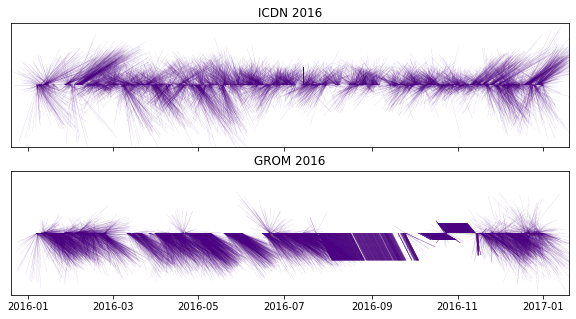

In [17]:
dt = 30

fig, (ax1, ax2) = plt.subplots(2,1, figsize=(10,5), sharex=True, sharey=True)
q1 = stick_plot(v_ICDN[::dt].index, u_ICDN[::dt], v_ICDN[::dt], ax=ax1, width=0.0001, scale=100, color='indigo')
ax1.set_title('ICDN 2016')
q2 = stick_plot(v_GROM[::dt].index, u_GROM[::dt]/3.6, v_GROM[::dt]/3.6, ax=ax2, width=0.0001, scale=100, color='indigo')
ax2.set_title('GROM 2016')


### 2015 time series

In [17]:
year = '2015'
df_ICDN_15 = get_dataFrame(year, 'ICDN')
df_GROM_15 = get_dataFrame(year, 'GROM')     

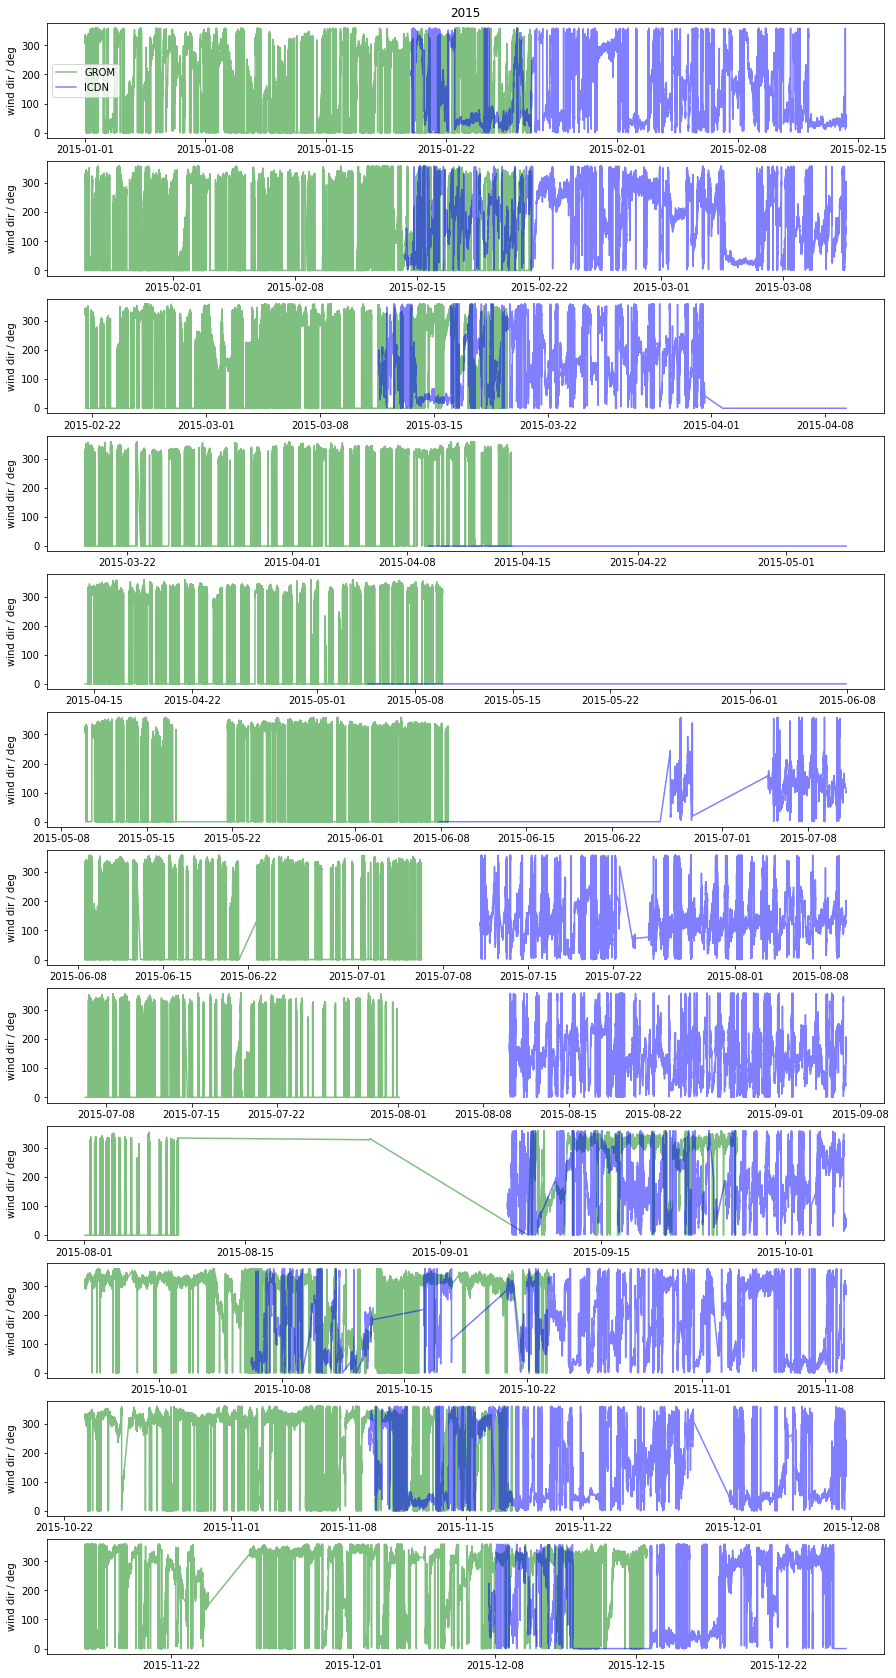

In [19]:
dir_GROM_15 = df_GROM_15['wind_dir']
dir_ICDN_15 = df_ICDN_15['wind_dir']

colors = ['green','blue']

fig, (ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10,ax11,ax12) = plt.subplots(12,1, figsize=(15,30), sharey=True)
axs = [ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10,ax11,ax12]
npts = int(len(df1.index)/len(axs))
for ax, jj in zip(axs,range(len(axs))):
    ax.plot(dir_GROM_15.index[jj*npts:(jj+1)*npts], dir_GROM_15[jj*npts:(jj+1)*npts]+offset,
            color=colors[0], alpha=0.5,label='GROM')
    ax.plot(dir_ICDN_15.index[jj*npts:(jj+1)*npts], dir_ICDN_15[jj*npts:(jj+1)*npts]+offset,
            color=colors[1], alpha=0.5,label='ICDN')
for ax in axs:
    ax.set_xlabel('')
    ax.set_ylabel('wind dir / deg')
ax1.legend()
ax1.set_title(year)
plt.show()

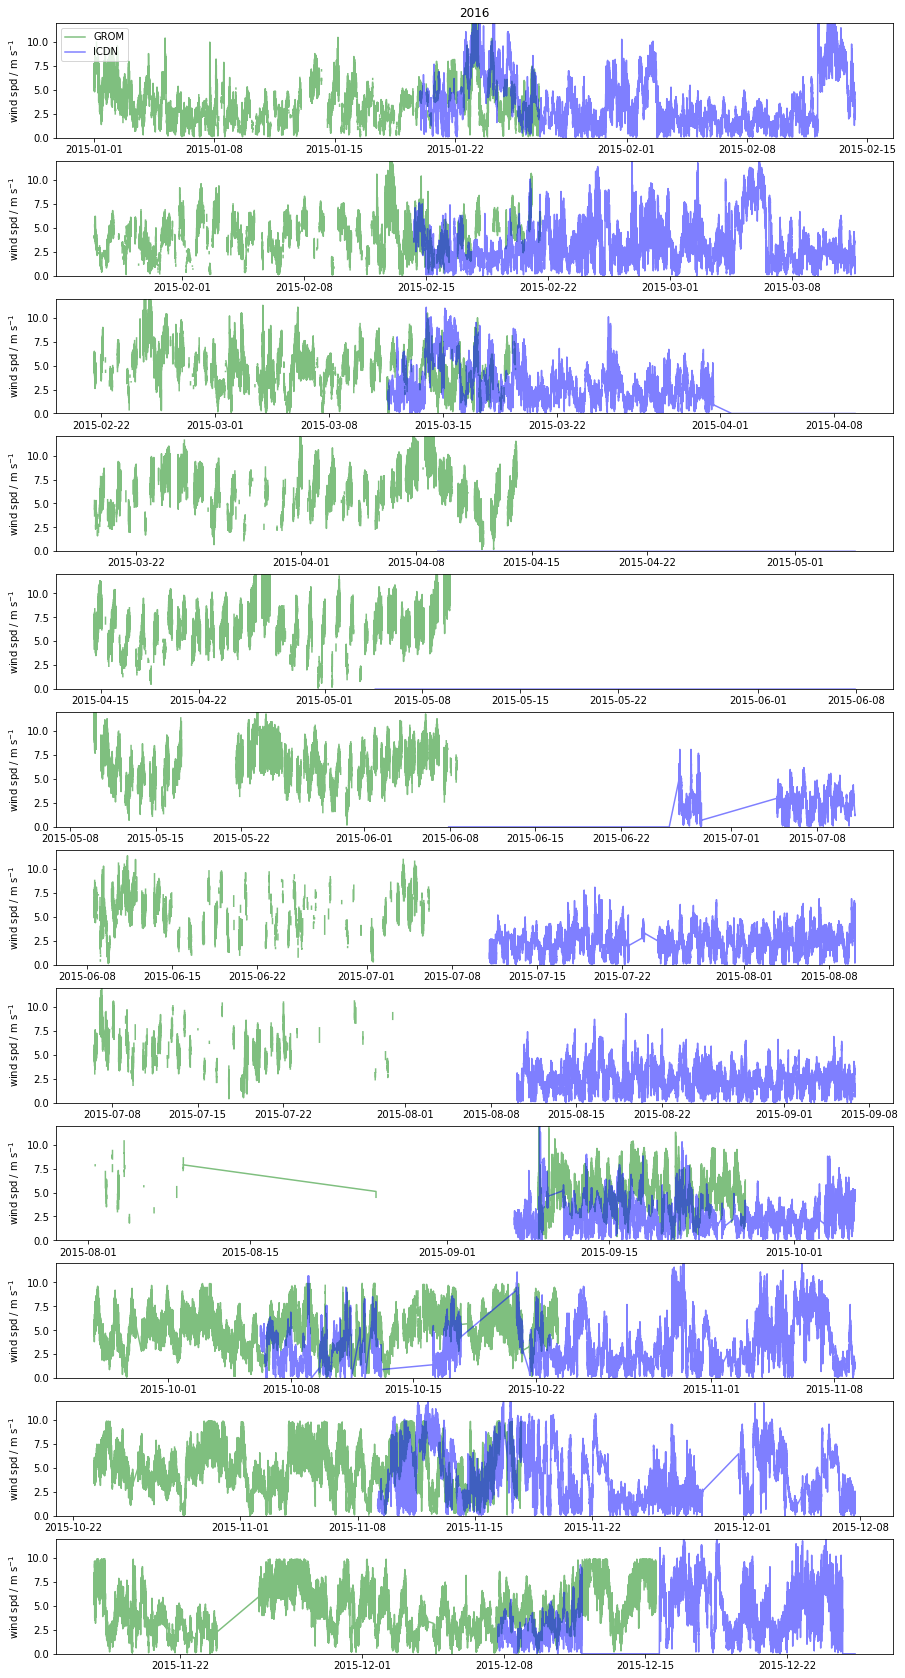

In [28]:
spd_GROM_15 = df_GROM_15['wind_speed']
spd_ICDN_15 = df_ICDN_15['wind_speed']

colors = ['green','blue']

fig, (ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10,ax11,ax12) = plt.subplots(12,1, figsize=(15,30), sharey=True)
axs = [ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10,ax11,ax12]
npts = int(len(df1.index)/len(axs))
for ax, jj in zip(axs,range(len(axs))):
    ax.plot(spd_GROM_15.index[jj*npts:(jj+1)*npts], spd_GROM_15[jj*npts:(jj+1)*npts]/3.6,
            color=colors[0], alpha=0.5,label='GROM')
    ax.plot(spd_ICDN_15.index[jj*npts:(jj+1)*npts], spd_ICDN_15[jj*npts:(jj+1)*npts],
            color=colors[1], alpha=0.5,label='ICDN')
for ax in axs:
    ax.set_xlabel('')
    ax.set_ylabel('wind spd / m s$^{-1}$')
    ax.set_ylim(0,12)
ax1.legend()

ax1.set_title('2015')
plt.show()

DatetimeIndex(['2016-01-06 19:11:00', '2016-01-06 19:12:00',
               '2016-01-06 19:13:00', '2016-01-06 19:14:00',
               '2016-01-06 19:15:00', '2016-01-06 19:16:00',
               '2016-01-06 19:17:00', '2016-01-06 19:18:00',
               '2016-01-06 19:19:00', '2016-01-06 19:20:00',
               ...
               '2016-12-31 23:50:00', '2016-12-31 23:51:00',
               '2016-12-31 23:52:00', '2016-12-31 23:53:00',
               '2016-12-31 23:54:00', '2016-12-31 23:55:00',
               '2016-12-31 23:56:00', '2016-12-31 23:57:00',
               '2016-12-31 23:58:00', '2016-12-31 23:59:00'],
              dtype='datetime64[ns]', length=410863, freq=None)